---
# A simple regression example using parametric and non-parametric methods
---

This is a simple example where we use two regression methods to enhance the overall data distribution from a dataset. 

1. A Linear fit (<i>parametric</i> method). 
2. The LOWESS method method (<i>non-parametric</i> method) that is often used in exploratory data analysis to reveal trends in the data. 
LOWESS stands for Locally Weighted Scatterplot Smoothing. 

We use a dataset that contains information about used-car resaling prices and their physical characteristics, such as engine power.


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

# Hides warning messages 
import warnings
warnings.filterwarnings("ignore")

Automatically created module for IPython interactive environment


Extract and clean the data:

In [2]:
# Get the headers for this dataset
cols = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
       "num_doors", "body_style", "drive_wheels", "engine_location",
       "wheel_base", "length", "width", "height", "curb_weight", "engine_type",
       "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
       "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg",
       "price"]

# Extract the data
cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos//imports-85.data", names=cols)

In [3]:
# Replace unknowns by NaNs
cars = cars.replace('?', np.nan)

# Now let's make things numeric
num_vars = ['normalized_losses', "bore", "stroke", "horsepower", "peak_rpm", "price"]

for i in num_vars:
    cars[i] = cars[i].astype('float64')
    
# Delete car data for which price and MPG is unavailable
cars = cars.dropna(subset = ['price', 'city_mpg'])
    
# Display the factors and the response (car price) 
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Parametric method

The following figure shows a <i>robust linear</i> fit between the selling price and the cars mileage in cities. 
The various body styles are indicated.   


<Figure size 576x576 with 0 Axes>

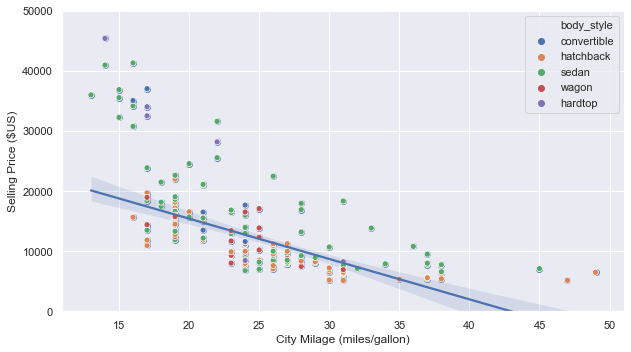

In [4]:
fig = plt.figure(figsize=(8, 8))

ax = sns.lmplot(x="city_mpg", y="price", data=cars, robust=True, height=5, aspect=1.8);
sns.scatterplot(x="city_mpg", y="price", hue="body_style", data=cars);
ax.set(xlabel='City Milage (miles/gallon)', ylabel='Selling Price ($US)')
ax.set(ylim=(0, 50000))
plt.savefig('Parametric fit (Linear fit) all cars.pdf')
plt.show()

The above linear fit does not look very good; it is usually better to do linear regressions with objects in the same 
class, in this case with cars with the same body style. This is shown in the next figure for wagon vehicles. 
The fit is better as the data points are uniformly spread along the line.


<Figure size 576x576 with 0 Axes>

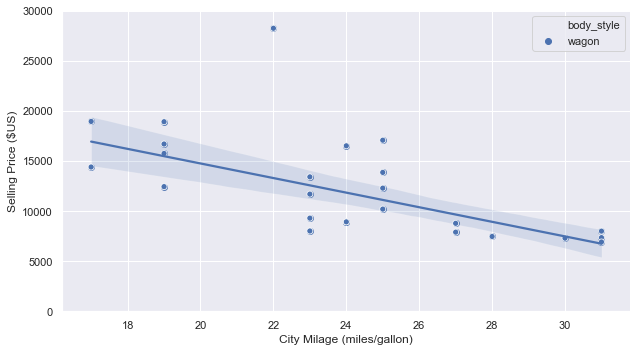

In [5]:
wagon = cars.loc[cars['body_style'] == 'wagon']

fig = plt.figure(figsize=(8, 8))
ax = sns.lmplot(x="city_mpg", y="price", data=wagon, robust=True, height=5, aspect=1.8);
sns.scatterplot(x="city_mpg", y="price", hue="body_style", data=wagon);
ax.set(xlabel='City Milage (miles/gallon)', ylabel='Selling Price ($US)')
ax.set(ylim=(0, 30000))
plt.savefig('Parametric fit (Linear fit) wagon cars.pdf')
plt.show()

## Non-Parametric method

The following figure shows a <i>robust non-linear</i> fit through the data. This is more a signal smoothing that an actual fit 
since no fit parameter is extracted from the analysis. At each point, a linear fit is made using only the data in a 
neighbourhood of that point. 

This example shows a well-known fact for buyers on the used-car market; the cars with the largest mileage are less desirable, 
and are sold at lower prices. 


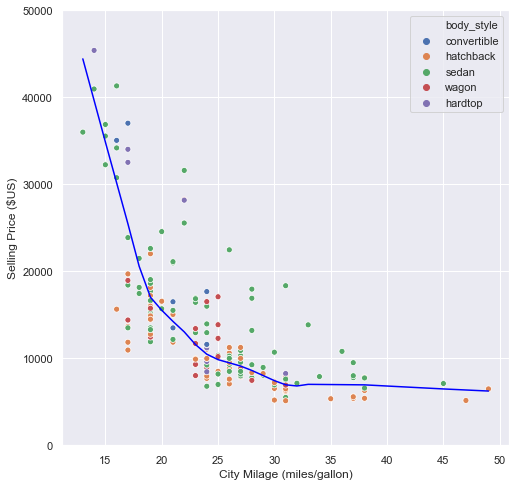

In [6]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

x = cars["city_mpg"].array
y = cars["price"].array

# Non-parametric fit  
xy = lowess(y, x, frac=0.33, is_sorted=False, return_sorted=True)

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="city_mpg", y="price", hue="body_style", data=cars);
ax.plot(xy[:,0],xy[:,1],color='blue')
ax.set_ylim([y.min(), y.max()])
ax.set(xlabel='City Milage (miles/gallon)', ylabel='Selling Price ($US)')
ax.set(ylim=(0, 50000))
plt.savefig('Non-parametric fit (LOWESS) all cars.pdf')
plt.show()